# Materi

## Why We Need to Prepare the Data

GIGO Effect (Garbage In, Garbage Out)

Data Issues

*   Completeness
    Tidak lengkapnya data secara baris dan kolom, terlebih pada perusahaan yang baru saja digital
*   Relevancy
    Hindari topic dan periode data yang tidak relevan dalam mencapai tujuan
*   Accuracy
    Typo, missing rows dan column merupakan human error yang biasa terjadi
*   Consistency
    Tidak konsistennya dalam format dan tipe data juga turut mengarahkan anda kepada error

## Data Collection and Profiling

Data Collection merupakan aktivitas mengumpulkan data dari berbagai sumber. Terdiri dari data Internal dan Eksternal.

* Internal, dapat ditemukan pada database, data warehouse
* Eksternal dapat ditemukan pada sosial media, public dan third party data

Data Profiling adalah proses memahami dataset baik secara struktur, isi, dan kualitas. Pada proses ini dapat menjawab
 * Kecocokan Analisis pada Bisnis
 * Statistik properti dari Data, seperti Distribusi dan Imbalance Data
 * Deteksi Awal pada Data, seperti missing values, anomali data dan data yang tidak konsisten

Contoh Data Architecture

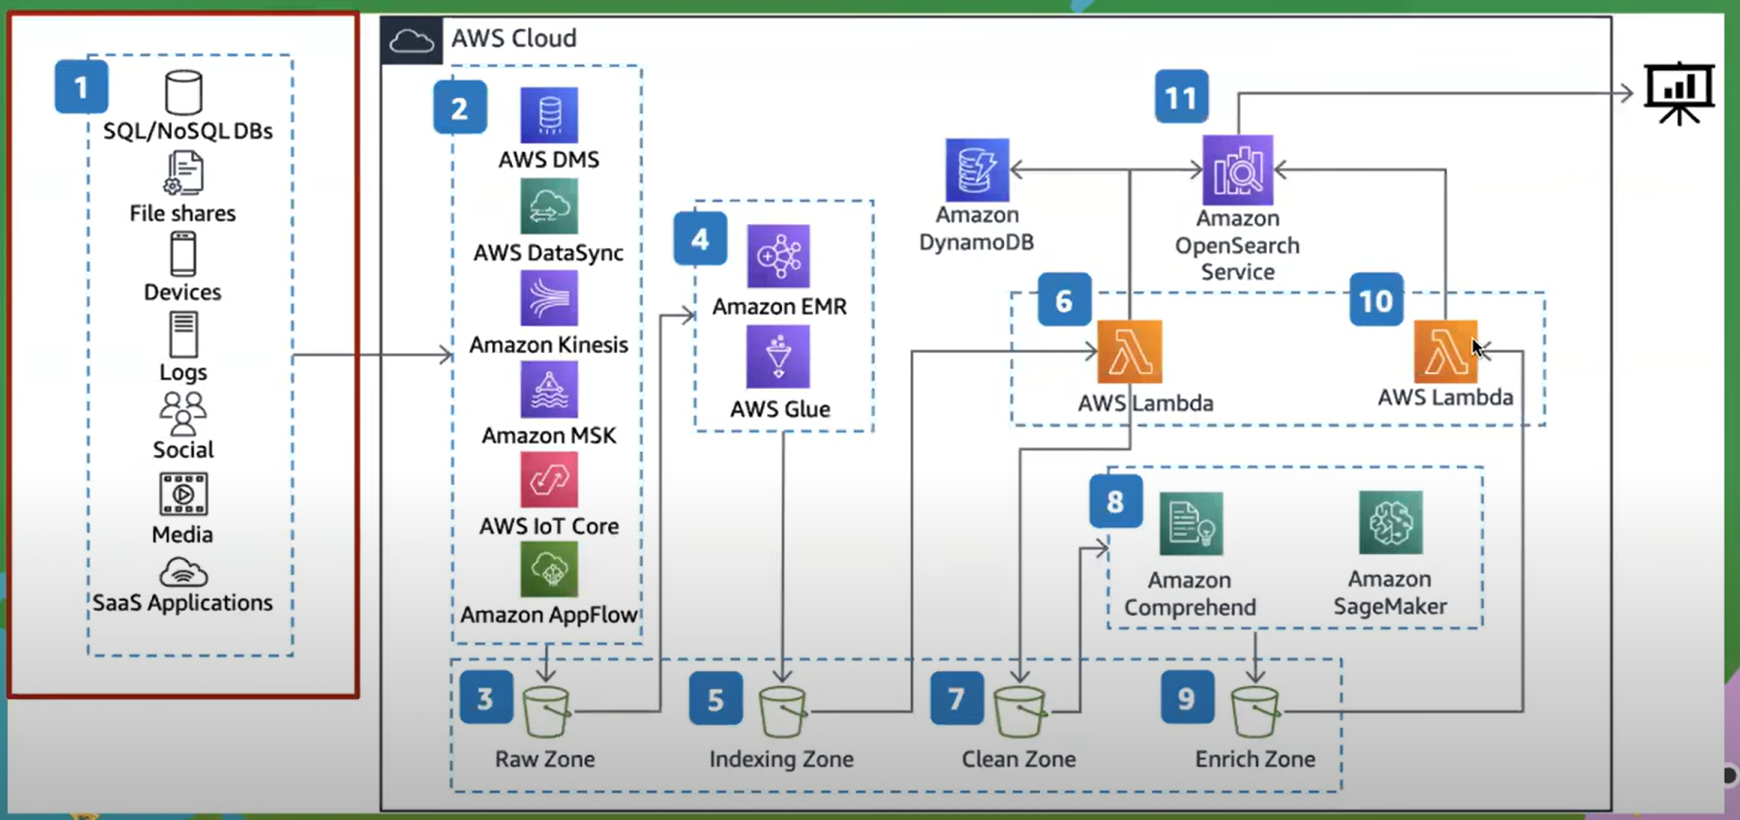

## Data Cleansing and Transformation

Merupakan proses identifikasi dan memperbaiki error dan data yang tidak konsisten.

* Remove Duplicate Records
* Handling Missing Values
* Dealing with Outliers
* Correcting Errors
* Filling in Missing Value
* Harmonizing Inconsistent Data and Format

## Data Combination and Analysis

**Data Combination**

Proses menggabungkan berbagai sumber menjadi satu dataset. Berfungsi untuk meningkatkan akurasi dan kesempurnaan data, atau untuk mendapatkan pengetahuan baru.

**Data Analysis**
Proses memahami informasi dari suatu data. Dapat dilakukan dengan berbagai teknik, seperti Analisis Statistik, Machine Learning, dan Visualisasi Data



## Data Validation and Publishing

**Data Validation**

Proses untuk memverifikasi akurasi, kesesuaian, dan konsistennya suatu data. Merupakan step yang penting dari data preparation untuk menghasilkan data yang dapat digunakan untuk analisis dan pengambilan keputusan

**Data Publishing**

Proses untuk membuat data dapat digunakan oleh orang lain. Biasanya dipublikasikan dalam website, database, atau data lake, data warehouse

**Key Benefits**

1. Meningkatkan Kualitas Data
2. Menyediakan Aksesibilitas Data
3. Meningkatkan Kolaborasi Data


## HandsOn

Missing Value

In [2]:
import pandas as pd
import numpy as np

# read in all our data
nfl_data = pd.read_csv("../content/NFL Play by Play 2009-2017 (v4).csv")

# set seed for reproducibility
np.random.seed(0)

<ipython-input-2-aa171be7c198>:5: DtypeWarning: Columns (25,51) have mixed types. Specify dtype option on import or set low_memory=False.
  nfl_data = pd.read_csv("..//content/NFL Play by Play 2009-2017 (v4).csv")


In [3]:
# look at the first five rows of the nfl_data file.
# I can see a handful of missing data already!
nfl_data.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [4]:
# get the number of missing data points per column
missing_values_count = nfl_data.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:10]

,0
Date,0
GameID,0
Drive,0
qtr,0
down,61154
time,224
TimeUnder,0
TimeSecs,224
PlayTimeDiff,444
SideofField,528


In [5]:
# how many total missing values do we have?
total_cells = np.product(nfl_data.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

27.66722370547874


In [6]:
# look at the # of missing points in the first ten columns
missing_values_count[0:10]

,0
Date,0
GameID,0
Drive,0
qtr,0
down,61154
time,224
TimeUnder,0
TimeSecs,224
PlayTimeDiff,444
SideofField,528


In [7]:
# remove all the rows that contain a missing value
nfl_data.dropna()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season


In [8]:
# remove all columns with at least one missing value
columns_with_na_dropped = nfl_data.dropna(axis=1)
columns_with_na_dropped.head()

,Date,GameID,Drive,qtr,TimeUnder,ydstogo,ydsnet,PlayAttempted,Yards.Gained,sp,...,AwayTeam,Timeout_Indicator,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,ExPoint_Prob,TwoPoint_Prob,Season
0,2009-09-10,2009091000,1,1,15,0,0,1,39,0,...,TEN,0,3,3,3,3,3,0.0,0.0,2009
1,2009-09-10,2009091000,1,1,15,10,5,1,5,0,...,TEN,0,3,3,3,3,3,0.0,0.0,2009
2,2009-09-10,2009091000,1,1,15,5,2,1,-3,0,...,TEN,0,3,3,3,3,3,0.0,0.0,2009
3,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,TEN,0,3,3,3,3,3,0.0,0.0,2009
4,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,TEN,0,3,3,3,3,3,0.0,0.0,2009


In [9]:
# just how much data did we lose?
print("Columns in original dataset: %d \n" % nfl_data.shape[1])
print("Columns with na's dropped: %d" % columns_with_na_dropped.shape[1])

Columns in original dataset: 102 

Columns with na's dropped: 37


In [10]:
# get a small subset of the NFL dataset
subset_nfl_data = nfl_data.loc[:, 'EPA':'Season'].head()
subset_nfl_data

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [11]:
# replace all NA's with 0
subset_nfl_data.fillna(0)

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,0.000000,0.000000,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,0.000000,0.000000,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,0.000000,0.000000,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.000000,0.000000,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009


In [12]:
# replace all NA's the value that comes directly after it in the same column,
# then replace all the remaining na's with 0
subset_nfl_data.fillna(method='bfill', axis=0).fillna(0)

<ipython-input-12-617457e8c201>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset_nfl_data.fillna(method='bfill', axis=0).fillna(0)


,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,-1.068169,1.146076,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,-0.032244,0.036899,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,3.318841,-5.031425,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.106663,-0.156239,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009
